# Data Analysis on Video Game Sales

## Visualization Data

## Final Objective
**Predict Japanese Sales using North America, European and Other Sales, Genre and Platform.**
> This result is important for games that want to enter the Japenese Market, but don't know what to expect for their respective sales team. Also, it will be a good measure to invest (or not) in japanese translations.

### Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xgboost

### Importing Data

In [14]:
path_input_train = "../Data/input_train_sales.csv"
path_input_valid = "../Data/input_validation_sales.csv"
path_output_train = "../Data/output_train_sales.csv"
path_output_valid = "../Data/output_validation_sales.csv"

In [21]:
input_train_df = pd.read_csv(path_input_train, index_col=0)
output_train_df = pd.read_csv(path_output_train, index_col=0)

input_valid_df = pd.read_csv(path_input_valid, index_col=0)
output_valid_df = pd.read_csv(path_output_valid, index_col=0)

In [22]:
input_train_df.head()

,NA_Sales,EU_Sales,Other_Sales,2600,3DO,3DS,DC,DS,GB,GBA,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Rank,,,,,,,,,,,,,,,,,,,,,
8561,0.00,0.00,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12992,0.05,0.00,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8791,0.00,0.00,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2340,0.36,0.43,0.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9950,0.00,0.00,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
output_train_df.head()

,JP_Sales
Rank,
8561,0.16
12992,0.00
8791,0.15
2340,0.00
9950,0.12


## Modelling

In [33]:
model = xgboost.XGBRegressor(booster="gbtree", objective='reg:squarederror')

In [41]:
model.fit(input_train_df, output_train_df)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [42]:
y_pred = model.predict(input_valid_df)

In [43]:
model.score(input_valid_df, output_valid_df)

0.44855118823210893

In [64]:
model.feature_importances_

array([4.20808718e-02, 2.12601963e-02, 1.34865018e-02, 0.00000000e+00,
       0.00000000e+00, 3.98449525e-02, 2.59388005e-03, 1.75512787e-02,
       9.23017934e-02, 1.26244985e-02, 4.66248253e-03, 1.02393981e-03,
       0.00000000e+00, 1.22765489e-02, 1.57209530e-01, 0.00000000e+00,
       3.01793162e-02, 2.33067214e-04, 1.94545556e-02, 1.09797642e-02,
       1.70196791e-03, 3.36808502e-03, 3.35757248e-02, 5.93038229e-03,
       1.23084877e-02, 1.21410776e-04, 7.96348602e-02, 0.00000000e+00,
       1.28201267e-03, 3.56118311e-03, 2.11302508e-02, 1.22879416e-01,
       5.35024516e-03, 7.86823966e-03, 4.95870318e-03, 5.10370359e-03,
       1.62548199e-02, 1.08223893e-02, 2.01417487e-02, 7.29043502e-03,
       1.36017213e-02, 9.47873667e-02, 3.55965644e-02, 6.22981647e-03,
       6.30510226e-03, 2.43203272e-03], dtype=float32)

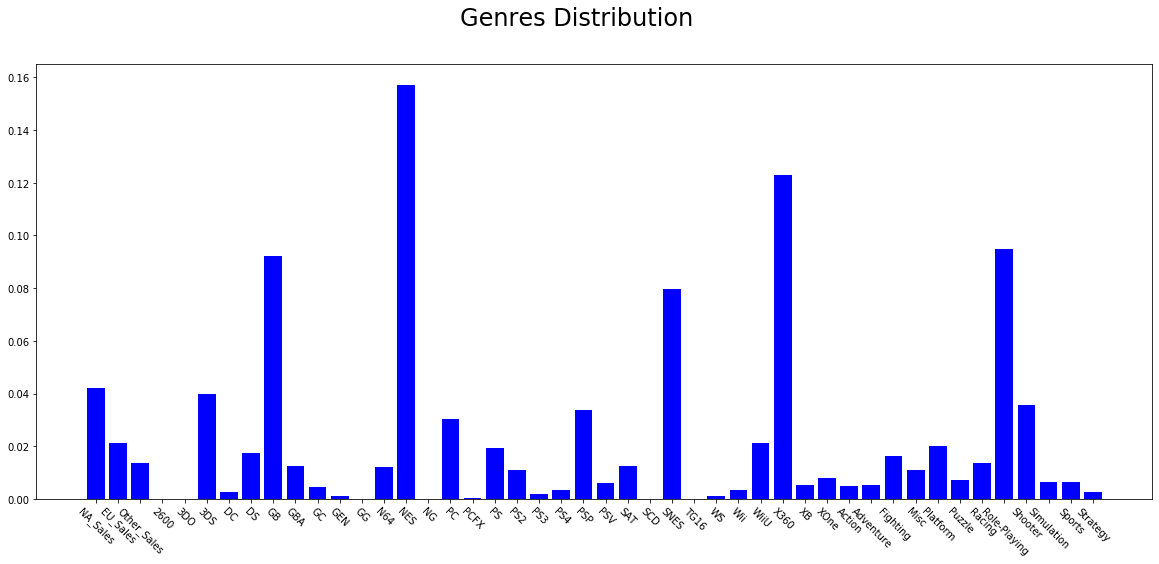

In [62]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.suptitle("Genres Distribution", fontsize=24)
ax.bar(input_valid_df.columns, model.feature_importances_, color='b')

plt.xticks(rotation=-45)
plt.show()